In [1]:
import pandas as pd
import numpy as np
import requests
import os
import json
import tweepy
import matplotlib.pyplot as plt
import re

## Gathering Data

1. Load twitter-archive-enhanced.csv from file handed by instructor
2. Load image-predictions.tsv from website
3. Query WeRateDogs twitter archive using Tweepy and store it into tweet_json.txt

In [2]:
# 1. Loading twitter-archieve-enhanced.csv file
twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [4]:
# tweet_ids for later use
tweet_ids=twitter_archive_enhanced['tweet_id']

In [5]:
#2. loading image-predictions.tsv from website
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open('image-predictions.tsv',mode='wb') as file:
    file.write(response.content)

In [6]:
image_predictions=pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [159]:
#3. Loading data from twitter through tweepy

consumer_key='consumer_key'
consumer_secret='consumer_secret'
access_token='access_token'
access_secret='access_secret'

auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

api=tweepy.API(auth)

In [10]:
# query each tweet based on the tweet_ids, errors will be recorded in the fails_dict dictionary
fails_dict={}
with open('tweet_json.txt','w') as output:
    for tweet_id in tweet_ids:
        try: 
            tweet=api.get_status(tweet_id,tweet_mode='extended',wait_on_rate_limit=True)
            json.dump(tweet._json,output)
            output.write('\n')
        except tweepy.TweepError as error:
            fails_dict[tweet_id]=error
            pass
    

In [11]:
# 25 errors when querying
# The error is either because of the tweet_id not found in Twitter or we are not authorized to view the tweet)
len(fails_dict)

25

In [12]:
cwd=os.getcwd()
os.listdir(cwd)

['wrangle_act.ipynb',
 '.ipynb_checkpoints',
 'twitter-archive-enhanced.csv',
 'image-predictions.tsv',
 'tweet_json_rog.txt ',
 'tweet_json.txt']

In [9]:
tweet_json=[]
with open('tweet_json.txt') as json_file:
    for line in json_file:
        status=json.loads(line)
        tweet_id=status['id_str']
        retweet_count=status['retweet_count']
        favorite_count=status['favorite_count']
        tweet_json.append({'tweet_id':tweet_id,'retweet_count':retweet_count,
                           'favorite_count':favorite_count})

In [10]:
tweet_json=pd.DataFrame(tweet_json)

In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null object
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [12]:
tweet_json.head()

,favorite_count,retweet_count,tweet_id
0,35862,7599,892420643555336193
1,30939,5628,892177421306343426
2,23283,3724,891815181378084864
3,39132,7776,891689557279858688
4,37386,8374,891327558926688256


## Accessing

### Quality issues

Here is a list of data quality issues I have identified from the three datasets:
##### `twitter_archive_enhanced` table
- retweeted_user_id and retweeted_status_id columns: Replies and retweets among the entries
- expanded_urls column: 59 Missing expanded_urls
- tweet_id column: tweet_id is an integer instead of a string
- timestamp column: timestamp is a string instead of datetime
- rating_denominator column: rating_denominator less/more than 10 (should be standardize to 10)
- name column: Over 745 tweets have no name with 55 named 'a'/'an'and some with really short names; Below are the detailed observations from these rows
 - Bo, Jo, Ed, JD, Mo are actual dog names
 - The actual name of the dog with the name Al is actually Al Cabone
 - The actual name of the dog with the name O is actually O'Malley
 - Below are some of the corrected dog names extracted manually from the text column of the rows with name a/an: (Example: Index name)
    - 1955 Kip
    - 2034 Jacob
    - 2066 Rufus
    - 2116 Spork
    - 2125 Cherokee
    - 2128 Hemry
    - 2146 Alphred
    - 2161 Alfredo
    - 2191 Leroi
    - 2218 Chuk
    - 2235 Alfonso
    - 2249 Cheryl
    - 2255 Jessiga
    - 2264 Klint
    - 2273 Kohl
    - 2287 Daryl
    - 2304 Pepe
    - 2311 Octaviath
    - 2314 Johm
    - 2204 Berta
- source column: long string; can be simplified and data type is string instead of categorical
- pupper,puppo,floofer and doggo columns:Around 1976 tweets having no dog stage data (all four stages showing 'None')
- rating_numerator and rating_denominator columns: these columns are not extracted properly from text

##### `image_predictions` table
- tweet_id column: tweet_id is integer instead of string
- p1,p2,p3 columns: dog breeds have inconsistent lower/uppercase
- img_num: img_num is float instead of integer
- p1, p1_conf columns:I only want to keep columns with highest confidence level

### Tidiness issues

##### `twitter_archive_enhanced` table
- Various stages of dog (ie doggo, floofer, pupper,puppo) in the `twitter_archieve_enhanced` table should be one column

##### `tweet_json` and `image_predictions`  table
- `tweet_json` and `image_predictions` should be merged with the `twitter_arvhive_enhanced` table as they are one observation 
unit.

#### Accessing process

In [71]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
twitter_archive_enhanced.shape

(2356, 17)

In [24]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [51]:
# checking for duplicates
twitter_archive_enhanced.tweet_id.duplicated().sum()

0

In [16]:
# number of missing values in expanded_urls column
twitter_archive_enhanced[twitter_archive_enhanced.expanded_urls.isnull()]['tweet_id'].count()

59

In [48]:
# check whether there are dog names which are does not start with capitalized letter 
twitter_archive_enhanced[~twitter_archive_enhanced.name.str[0].str.isupper()].name.count()

109

In [12]:
# Investigate the name column: Some of these names are incorrectly identified
twitter_archive_enhanced[twitter_archive_enhanced.name.apply(len)<3]['name'].value_counts()

a     55
Bo     9
an     7
Al     1
by     1
Jo     1
Ed     1
JD     1
O      1
my     1
Mo     1
Name: name, dtype: int64

In [37]:
# saving them into odd_name for further analysis
odd_name=twitter_archive_enhanced[twitter_archive_enhanced.name.apply(len)<3][['tweet_id','text','name']]

In [36]:
# Did an analysis through visualization for these text data to find out the correct names for these dogs
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='a']['text']

56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: p...
649     Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.c...
801     Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10...
1002    This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10...
1004    Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk h...
1017    This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https...
1049    This is a very rare Great Alaskan Bush Pupper. Hard to stumble upon without spooking. 12/10 would pet passionately h...
1193    People please. This is a Deadly Mediterranean Plop T-Rex. We only rate dogs. Only send in dogs. 

In [38]:
# Did the same for these
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='an']['text']

759     RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10...
1025    This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 h...
1362    This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/i...
2204    This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 ...
2333    This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively ...
2335    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 htt...
2349    This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 h...
Name: text, dtype: object

In [41]:
# So the name for this dog is actually Al Cabone instead of Al
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='Al']['text']

820    Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution ...
Name: text, dtype: object

In [43]:
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='Jo']['text']

2219    This is Jo. Jo is a Swedish Queso. Tongue bigger than face. Tiny lil legs. Still no seatbelt. Simply careless. 8/10 ...
Name: text, dtype: object

In [42]:
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='Ed']['text']

1988    This is Ed. He's not mad, just disappointed. 10/10 https://t.co/BIljU0zhLN
Name: text, dtype: object

In [44]:
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='JD']['text']

2041    This is JD (stands for "just dog"). He's like Airbud but with trading card games instead of sports. 10/10 much skill...
Name: text, dtype: object

In [45]:
# this dog's name is actually O'Malley
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='O']['text']

775    This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
Name: text, dtype: object

In [46]:
pd.options.display.max_colwidth = 120
odd_name[odd_name.name=='Mo']['text']

393    This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t...
Name: text, dtype: object

In [26]:
odd_name[odd_name.name=='a']['text'].iloc[-10]

'This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa'

In [63]:
# Number of rows without dog stage data
twitter_archive_enhanced[(twitter_archive_enhanced.doggo=='None') & 
 (twitter_archive_enhanced.floofer=='None') &
 (twitter_archive_enhanced.pupper=='None') & 
 (twitter_archive_enhanced.puppo=='None')]['name'].count()

1976

In [77]:
twitter_archive_enhanced.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [64]:
twitter_archive_enhanced.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [66]:
twitter_archive_enhanced.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [69]:
twitter_archive_enhanced.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [79]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
image_predictions['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
teddy                         18
beagle                        18
Eskimo_dog                    18
Shetland_sheepdog             18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
kuvasz                        16
Italian_greyhound             16
          

In [9]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
tweet_id          2331 non-null object
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## Cleaning Data

In [78]:
twitter_archive_clean=twitter_archive_enhanced.copy()
image_predictions_clean=image_predictions.copy()
tweet_json_clean=tweet_json.copy()

### Quality Issues

##### `twitter_archive_enhanced` table

#### 1. retweeted_user_id and retweeted_status_id columns: Replies and retweets among the entries

**Define**

If there are values in the column in_reply_to_status_id, in_reply_to_user_id, means this Tweet is a reply. If there are values in the column retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp, means this Tweet is a retweet. In order to remove the reply and retweet from the dataset, I will remove the rows which have values in the in_reply_to_status_id and retweeted_status_id columns.

**Code**

In [79]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean['in_reply_to_status_id'].isnull() & 
                      twitter_archive_clean['retweeted_status_id'].isnull()]

In [80]:
# droppping in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp columns
twitter_archive_clean=twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id',
                                                  'retweeted_status_id','retweeted_status_user_id', 
                                                  'retweeted_status_timestamp'],axis=1)

**Test**

All replies and retweets have been removed from the dataset.

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### 2. expanded_urls column: 59 Missing expanded_urls

**Define**

The project requires us to only gather tweets with pictures. I am assuming without the expanded_urls, means this tweet does not have a picture attached.

**Code**

In [82]:
twitter_archive_clean=twitter_archive_clean[~twitter_archive_clean.expanded_urls.isnull()]

**Test**

In [83]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


#### 3. tweet_id column: tweet_id is an integer instead of a string

**Define**

tweet_id should be a string instead of an integer. Change the data to to string using astype() method

**Code**

In [84]:
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)

**Test**

Data type for tweet_id now is object instead of int64

In [85]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(2), object(10)
memory usage: 212.7+ KB


#### 4. timestamp column: timestamp is a string instead of datetime

**Define**

timestamp column should be in Pandas datetime format so we can make datetime calculation easier. Pandas to_datetime() method will be used to convert the string to datetime format.

**Code**

In [86]:
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)

**Test**

In [87]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 212.7+ KB


#### 5. name column: Over 745 tweets have no name 

**Define**

Over 745 tweets have no name. Among them are tweets which are not dogs. So I have decided to remove all the tweets with the name value 'None'.

**Code**

In [88]:
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.name!='None']

**Test**

In [89]:
twitter_archive_clean.name.value_counts()

a            55
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Winston       8
the           8
Lola          8
Daisy         7
Toby          7
Koda          6
an            6
Jax           6
Bailey        6
Oscar         6
Bo            6
Bella         6
Stanley       6
Milo          5
Dave          5
Buddy         5
Chester       5
Scout         5
Rusty         5
Bentley       5
Leo           5
Louis         5
             ..
Shadoe        1
Humphrey      1
Alejandro     1
Frönq         1
Aqua          1
Tuco          1
Socks         1
Crumpet       1
Hanz          1
Aja           1
Tonks         1
Anthony       1
Barry         1
Tyrus         1
Sailor        1
Happy         1
Sprinkles     1
Rambo         1
Mingus        1
Barney        1
Brandi        1
BeBe          1
Lilli         1
Ralphus       1
Marlee        1
Lugan         1
Zeek          1
Willy         1
Bowie         1
Mya           1
Name: name, Length: 954,

#### 6. name column: 55 named 'a'/'an'

**Define**

These obviously are mistakenly identified name during scrapping from the twitter text. I did a manual scrapping visually and came out with a list of index and corrected names for some of the tweets:
    - 1955 Kip
    - 2034 Jacob
    - 2066 Rufus
    - 2116 Spork
    - 2125 Cherokee
    - 2128 Hemry
    - 2146 Alphred
    - 2161 Alfredo
    - 2191 Leroi
    - 2218 Chuk
    - 2235 Alfonso
    - 2249 Cheryl
    - 2255 Jessiga
    - 2264 Klint
    - 2273 Kohl
    - 2287 Daryl
    - 2304 Pepe
    - 2311 Octaviath
    - 2314 Johm
    - 2204 Berta
    
I will replace the name value with the correct names.

**Code**

In [90]:
twitter_archive_clean.loc[1955,'name']='Kip'
twitter_archive_clean.loc[2034,'name']='Jacob'
twitter_archive_clean.loc[2066,'name']='Rufus'
twitter_archive_clean.loc[2116,'name']='Spork'
twitter_archive_clean.loc[2125,'name']='Cherokee'
twitter_archive_clean.loc[2128,'name']='Hemry'
twitter_archive_clean.loc[2146,'name']='Alphred'
twitter_archive_clean.loc[2161,'name']='Alfredo'
twitter_archive_clean.loc[2191,'name']='Leroi'
twitter_archive_clean.loc[2218,'name']='Chuk'
twitter_archive_clean.loc[2235,'name']='Alfonso'
twitter_archive_clean.loc[2249,'name']='Cheryl'
twitter_archive_clean.loc[2255,'name']='Jessiga'
twitter_archive_clean.loc[2264,'name']='Klint'
twitter_archive_clean.loc[2273,'name']='Kohl'
twitter_archive_clean.loc[2287,'name']='Daryl'
twitter_archive_clean.loc[2304,'name']='Pepe'
twitter_archive_clean.loc[2311,'name']='Octaviath'
twitter_archive_clean.loc[2314,'name']='Jomn'
twitter_archive_clean.loc[2204,'name']='Berta'

In [91]:
# removing the rest of the rows with a/an which can't be fix because we do not have the proper name
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean.name!= 'a') & (twitter_archive_clean.name!='an')]

**Test**

In [92]:
pd.options.display.max_colwidth = 120
print(twitter_archive_clean.loc[1955,['text','name']])
print(twitter_archive_clean.loc[2034,['text','name']])
print(twitter_archive_clean.loc[2066,['text','name']])
print(twitter_archive_clean.loc[2116,['text','name']])
print(twitter_archive_clean.loc[2125,['text','name']])
print(twitter_archive_clean.loc[2128,['text','name']])
print(twitter_archive_clean.loc[2146,['text','name']])
print(twitter_archive_clean.loc[2161,['text','name']])
print(twitter_archive_clean.loc[2191,['text','name']])
print(twitter_archive_clean.loc[2218,['text','name']])
print(twitter_archive_clean.loc[2235,['text','name']])
print(twitter_archive_clean.loc[2249,['text','name']])
print(twitter_archive_clean.loc[2255,['text','name']])
print(twitter_archive_clean.loc[2264,['text','name']])
print(twitter_archive_clean.loc[2273,['text','name']])
print(twitter_archive_clean.loc[2287,['text','name']])
print(twitter_archive_clean.loc[2304,['text','name']])
print(twitter_archive_clean.loc[2311,['text','name']])
print(twitter_archive_clean.loc[2314,['text','name']])
print(twitter_archive_clean.loc[2204,['text','name']])

text    This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly ...
name                                                                                                                        Kip
Name: 1955, dtype: object
text    This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet htt...
name                                                                                                                      Jacob
Name: 2034, dtype: object
text    This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10...
name                                                                                                                      Rufus
Name: 2066, dtype: object
text    This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute ...
name                      

#### 7. name column: The actual name of the dog with the name Al is actually Al Cabone

**Define**

The actual name of the dog with the name Al is actually Al Cabone. I will replace the name value with Al Cabone.

**Code**

In [93]:
mask_al=twitter_archive_clean.name=='Al'
twitter_archive_clean.loc[mask_al,'name']='Al Cabone'

**Test**

In [94]:
twitter_archive_clean.loc[mask_al][['text','name']]

,text,name
820,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution ...,Al Cabone


#### 8. name column: The actual name of the dog with the name O is actually O'Malley

**Define**

The actual name of the dog with the name O is actually O'Malley. I will replace the name value with O'Malley.

**Code**

In [95]:
mask_o=twitter_archive_clean.name=='O'
twitter_archive_clean.loc[mask_o,'name']="O'Malley"

**Test**

In [96]:
twitter_archive_clean.loc[mask_o][['text','name']]

,text,name
775,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O'Malley


#### 9. source column: long string; can be simplified and data type is string instead of categorical

**Define**

The string for the source is long, can be simplified

**Code**


In [97]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1378
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          45
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [98]:
# simplifying the string
twitter_archive_clean.source=twitter_archive_clean.source.apply(lambda text: re.search(r'>(.+)</a>',text).group(1))

In [99]:
# converting the datatype to categorical
twitter_archive_clean.source=twitter_archive_clean.source.astype('category')

**Test**

In [100]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1378
Vine - Make a Scene      45
Twitter Web Client       20
TweetDeck                10
Name: source, dtype: int64

In [101]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 2346
Data columns (total 12 columns):
tweet_id              1453 non-null object
timestamp             1453 non-null datetime64[ns]
source                1453 non-null category
text                  1453 non-null object
expanded_urls         1453 non-null object
rating_numerator      1453 non-null int64
rating_denominator    1453 non-null int64
name                  1453 non-null object
doggo                 1453 non-null object
floofer               1453 non-null object
pupper                1453 non-null object
puppo                 1453 non-null object
dtypes: category(1), datetime64[ns](1), int64(2), object(8)
memory usage: 177.8+ KB


#### 10. pupper,puppo,floofer and doggo columns:Around 1976 tweets having no dog stage data (all four stages showing 'None')

**Define**

Since there is a huge number of rows without the dog stage data, I am going to leave it as it is. I will clean this after combining these columns into one column later.

##### 11. rating_numerator and rating_denominator columns: these columns are not extracted properly from text

**Define**

The rating_numerator and rating_denominator columns are not extracted properly from text. Regular expression is use to re-extract the proper values from the text column.

**Code**

In [102]:
rating = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']

In [103]:
twitter_archive_clean[['rating_numerator','rating_denominator']]=rating[['rating_numerator','rating_denominator']]

In [104]:
twitter_archive_clean['rating_numerator']=twitter_archive_clean.rating_numerator.astype(float)
twitter_archive_clean['rating_denominator']=twitter_archive_clean.rating_denominator.astype(float)

**Test**

In [105]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      351
11.00      322
10.00      293
13.00      189
9.00       110
8.00        77
7.00        34
14.00       20
6.00        18
5.00        13
3.00        10
4.00         5
2.00         4
9.75         1
24.00        1
11.27        1
204.00       1
13.50        1
50.00        1
1776.00      1
Name: rating_numerator, dtype: int64

In [106]:
pd.options.display.max_colwidth = 130
twitter_archive_clean[twitter_archive_clean['rating_numerator'].isin([9.75,11.27,13.5])][['text','rating_numerator']]

,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/...",13.50
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would...,11.27


##### `image_predictions` table

#### 12. tweet_id column: tweet_id is integer intead of string 

**Define**

tweet_id should be a string instead of an integer. I will convert the data type to string using astype() method.

**Code**

In [107]:
image_predictions_clean.tweet_id=image_predictions_clean.tweet_id.astype(str)

**Test**

In [108]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 13. p1,p2,p3 columns: dog breeds have inconsistent lower/uppercase

**Define**

Removing all the special characters in the p1,p2,p3 columns and capitalize each word in those columns for consistency.

**Code**

In [109]:
image_predictions_clean['p1']=image_predictions_clean['p1'].apply(lambda x: re.sub(r'\W+|_', ' ',x).title())
image_predictions_clean['p2']=image_predictions_clean['p2'].apply(lambda x: re.sub(r'\W+|_', ' ',x).title())
image_predictions_clean['p3']=image_predictions_clean['p3'].apply(lambda x: re.sub(r'\W+|_', ' ',x).title())

**Test**

In [110]:
image_predictions_clean['p1'].sample(5)

641                         Samoyed
1114    German Short Haired Pointer
1495                       Cardigan
132                 Shopping Basket
1122                          Teddy
Name: p1, dtype: object

In [111]:
image_predictions_clean['p2'].sample(5)

1320    French Bulldog
210         Hair Spray
1740          Malamute
406     Cocker Spaniel
1818             Bison
Name: p2, dtype: object

In [112]:
image_predictions_clean['p3'].sample(5)

1918    Japanese Spaniel
1647    Golden Retriever
935               Carton
1233     Norwich Terrier
1269    Blenheim Spaniel
Name: p3, dtype: object

#### 14. img_num: img_num is float instead of integer

**Define**

img_num should be integer instead of float. I will change the data type using astype() method.

**Code**

In [113]:
image_predictions_clean.img_num=image_predictions_clean.img_num.astype(int)

**Test**

In [114]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 15. p1, p1_conf columns:only keep columns with highest confidence level and rename p, p1_conf columns

**Define**

Remove columns for p2 and p3 and rename p1 to dog_breed and p1_conf to confidence

**Code**

In [115]:
# removing rows which are not dogs by taking only rows with all three p1_dog, p2_dog and p3_dog are true
image_predictions_clean=image_predictions_clean[(image_predictions_clean.p1_dog==True) & 
                                              (image_predictions_clean.p2_dog==True) & 
                                              (image_predictions_clean.p3_dog==True)]

In [116]:
image_predictions_clean.drop(['p1_dog',
                             'p2','p2_conf','p2_dog',
                             'p3','p3_conf','p3_dog'],axis=1,inplace=True)

In [117]:
image_predictions_clean=image_predictions_clean.rename(columns={'p1':'dog_breed','p1_conf':'confidence'})

**Test**

In [118]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 5 columns):
tweet_id      1243 non-null object
jpg_url       1243 non-null object
img_num       1243 non-null int64
dog_breed     1243 non-null object
confidence    1243 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.3+ KB


### Tidiness issue

##### `twitter_archive_enhanced` table

#### 1. Various stages of dog (ie doggo, floofer, pupper,puppo) in the `twitter_archieve_enhanced` table should be one column

**Define**

Melt doggo,floofer, pupper,puppo column into one column

**Code**

In [119]:
# handle none
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stages'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == 'doggopupper', 'dog_stages'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == 'doggopuppo', 'dog_stages'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == 'doggofloofer', 'dog_stages'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stages == '', 'dog_stages'] = np.nan

# dropping doggo, floofer, pupper and puppo columns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

**Test**

In [120]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 2346
Data columns (total 9 columns):
tweet_id              1453 non-null object
timestamp             1453 non-null datetime64[ns]
source                1453 non-null category
text                  1453 non-null object
expanded_urls         1453 non-null object
rating_numerator      1453 non-null float64
rating_denominator    1453 non-null float64
name                  1453 non-null object
dog_stages            194 non-null object
dtypes: category(1), datetime64[ns](1), float64(2), object(5)
memory usage: 143.8+ KB


In [121]:
twitter_archive_clean.dog_stages.value_counts()

pupper           128
doggo             40
puppo             16
doggo, pupper      5
floofer            5
Name: dog_stages, dtype: int64

##### `tweet_json` and `image_predictions` table

#### 2. tweet_json_clean and image_predictions_clean should be merged with the twitter_archive_clean table as they are one observation unit.

**Define**

`tweet_json_clean` and `image_predictions_clean` should be merged with the `twitter_archive_clean` table as they are one observation 
unit.


**Code**

In [122]:
# merging twitter_archive_clean and tweet_json_clean
twitter_archive_master=pd.merge(twitter_archive_clean,tweet_json_clean,how='left',on='tweet_id')

In [123]:
# merging again with image_predictions_clean
twitter_archive_master=pd.merge(twitter_archive_master,image_predictions_clean,how='left',on='tweet_id')

In [124]:
# dropping NaN rows from tweet_json_clean and image_predictions_clean while ignoring the dog_stages column
twitter_archive_master=twitter_archive_master.dropna(subset=['favorite_count','jpg_url'])

In [125]:
# favorite_count,retweet_count, and img_num data type have been changed to float64 after merging due to NaN
# changing them back to int64
twitter_archive_master['favorite_count']=twitter_archive_master['favorite_count'].astype(int)
twitter_archive_master['retweet_count']=twitter_archive_master['retweet_count'].astype(int)
twitter_archive_master['img_num']=twitter_archive_master['img_num'].astype(int)

**Test**

In [126]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 877 entries, 1 to 1452
Data columns (total 15 columns):
tweet_id              877 non-null object
timestamp             877 non-null datetime64[ns]
source                877 non-null category
text                  877 non-null object
expanded_urls         877 non-null object
rating_numerator      877 non-null float64
rating_denominator    877 non-null float64
name                  877 non-null object
dog_stages            115 non-null object
favorite_count        877 non-null int64
retweet_count         877 non-null int64
jpg_url               877 non-null object
img_num               877 non-null int64
dog_breed             877 non-null object
confidence            877 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 103.8+ KB


### Storing the final results into twitter_archive_master.csv

In [128]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

### Data Analysis and Visualization

In [129]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')
% matplotlib inline

1. Comparing retweets and favorites overtime
2. Plotting which dogs are more popular
3. Distrution of life dog stages

#### Comparing Tweets and Replies overtime

In [130]:
twitter_archive_master.timestamp=pd.to_datetime(twitter_archive_master.timestamp)

In [131]:
sum_retweet=twitter_archive_master.groupby(pd.Grouper(key='timestamp',freq='1w'))['retweet_count'].sum().reset_index().sort_values('timestamp')
sum_favorite=twitter_archive_master.groupby(pd.Grouper(key='timestamp',freq='1w'))['favorite_count'].sum().reset_index().sort_values('timestamp')

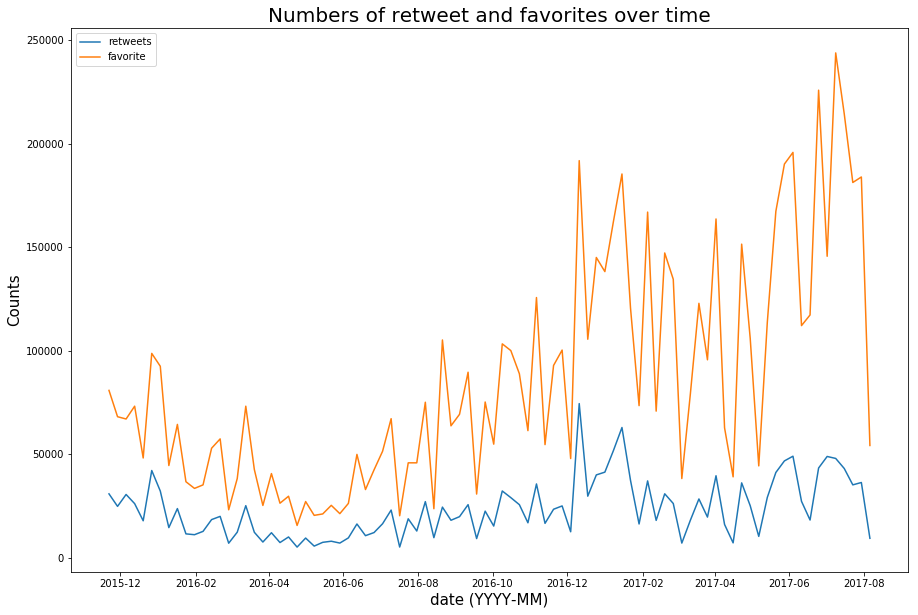

In [132]:
plt.subplots(figsize=(15,10))
plt.plot(sum_retweet.timestamp,sum_retweet.retweet_count, label='retweets')
plt.plot(sum_favorite.timestamp,sum_favorite.favorite_count,label='favorite')
plt.title('Numbers of retweet and favorites over time', fontsize=20)
plt.xlabel('date (YYYY-MM)',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend()
plt.savefig('fig1_retweet_favorites_over_time.png')

#### Plotting which dog breed is more popular

In [133]:
dog_counts=twitter_archive_master.groupby('dog_breed')['tweet_id'].count()

In [134]:
dog_counts_top10=dog_counts.sort_values(ascending=False)[:10]

In [135]:
dog_breed=dog_counts_top10.index

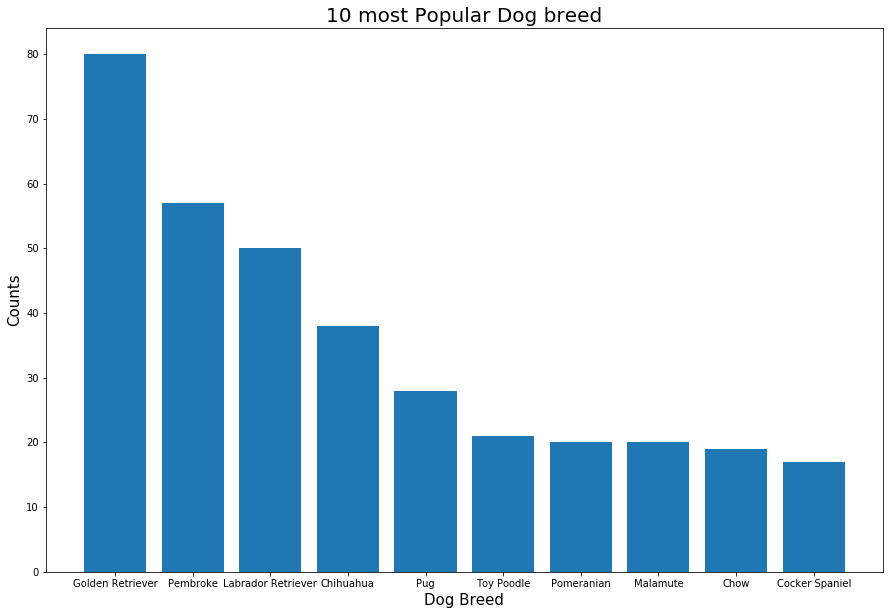

In [136]:
plt.subplots(figsize=(15,10))
plt.bar([*range(1,11)],dog_counts_top10,tick_label=dog_breed)
plt.title('10 most Popular Dog breed',fontsize=20)
plt.xlabel('Dog Breed',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.savefig('fig2_top10_dog_breed.png')

#### Distribution of dog life stages

In [137]:
dog_stage_count=twitter_archive_master[twitter_archive_master.dog_stages!='None'].groupby('dog_stages')['tweet_id'].count()

In [138]:
labels=dog_stage_count.index

In [139]:
sizes=dog_stage_count

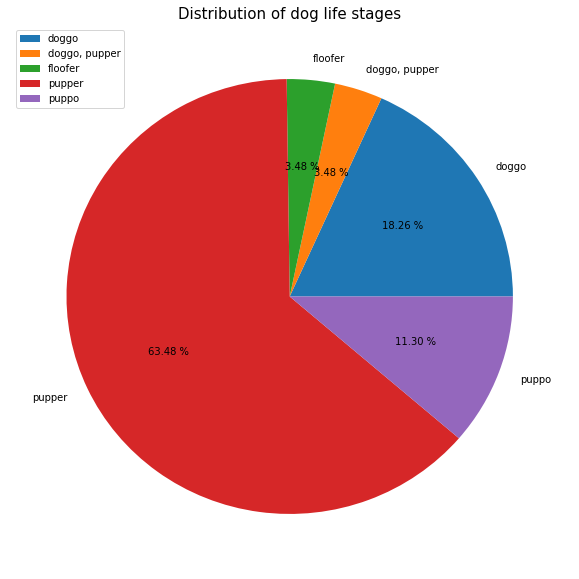

In [142]:
plt.subplots(figsize=(10,10))
plt.pie(dog_stage_count.loc[['doggo', 'doggo, pupper', 'floofer', 'pupper', 'puppo']],labels=labels,autopct='%.2f %%')
plt.title('Distribution of dog life stages',fontsize=15)
plt.legend()
plt.savefig('fig3_dog_life_stages.png')

In [ ]:
!tar chvfz notebook.tar.gz *